In [14]:
import pkufiber as pf
from torch.utils.data.dataloader import DataLoader

data = pf.data.FiberDataset(path='/home/xiaoxinyu/TorchFiber/dataset_A800/test.h5', Nmodes=2, Nch=3, Rs=80, Pch=0, window_size=1, pre_transform='Rx_CDCDDLMS(taps=32,lr=[0.015625, 0.0078125])', num_symb=60000)
loader = DataLoader(data, batch_size=40000)
for y,x,z in loader:
    break
print(y.shape, x.shape, z.shape)

pf.qfactor_all(y[:,0,:],x)

def Q(pch):
    data = pf.data.FiberDataset(path='/home/xiaoxinyu/TorchFiber/dataset_A800/test.h5', Nmodes=2, Nch=3, Rs=80, Pch=pch, window_size=1, pre_transform='Rx_CDCDDLMS(taps=32,lr=[0.015625, 0.0078125])', num_symb=60000)
    loader = DataLoader(data, batch_size=40000)
    for y,x,z in loader:
        break
    print(y.shape, x.shape, z.shape)

    return pf.qfactor_all(y[:,0,:],x)

In [63]:
Q0 = [Q(x) for x in [-6, -3, 0, 3, 6]]

torch.Size([40000, 1, 2]) torch.Size([40000, 2]) torch.Size([40000, 4])
torch.Size([40000, 1, 2]) torch.Size([40000, 2]) torch.Size([40000, 4])
torch.Size([40000, 1, 2]) torch.Size([40000, 2]) torch.Size([40000, 4])
torch.Size([40000, 1, 2]) torch.Size([40000, 2]) torch.Size([40000, 4])
torch.Size([40000, 1, 2]) torch.Size([40000, 2]) torch.Size([40000, 4])


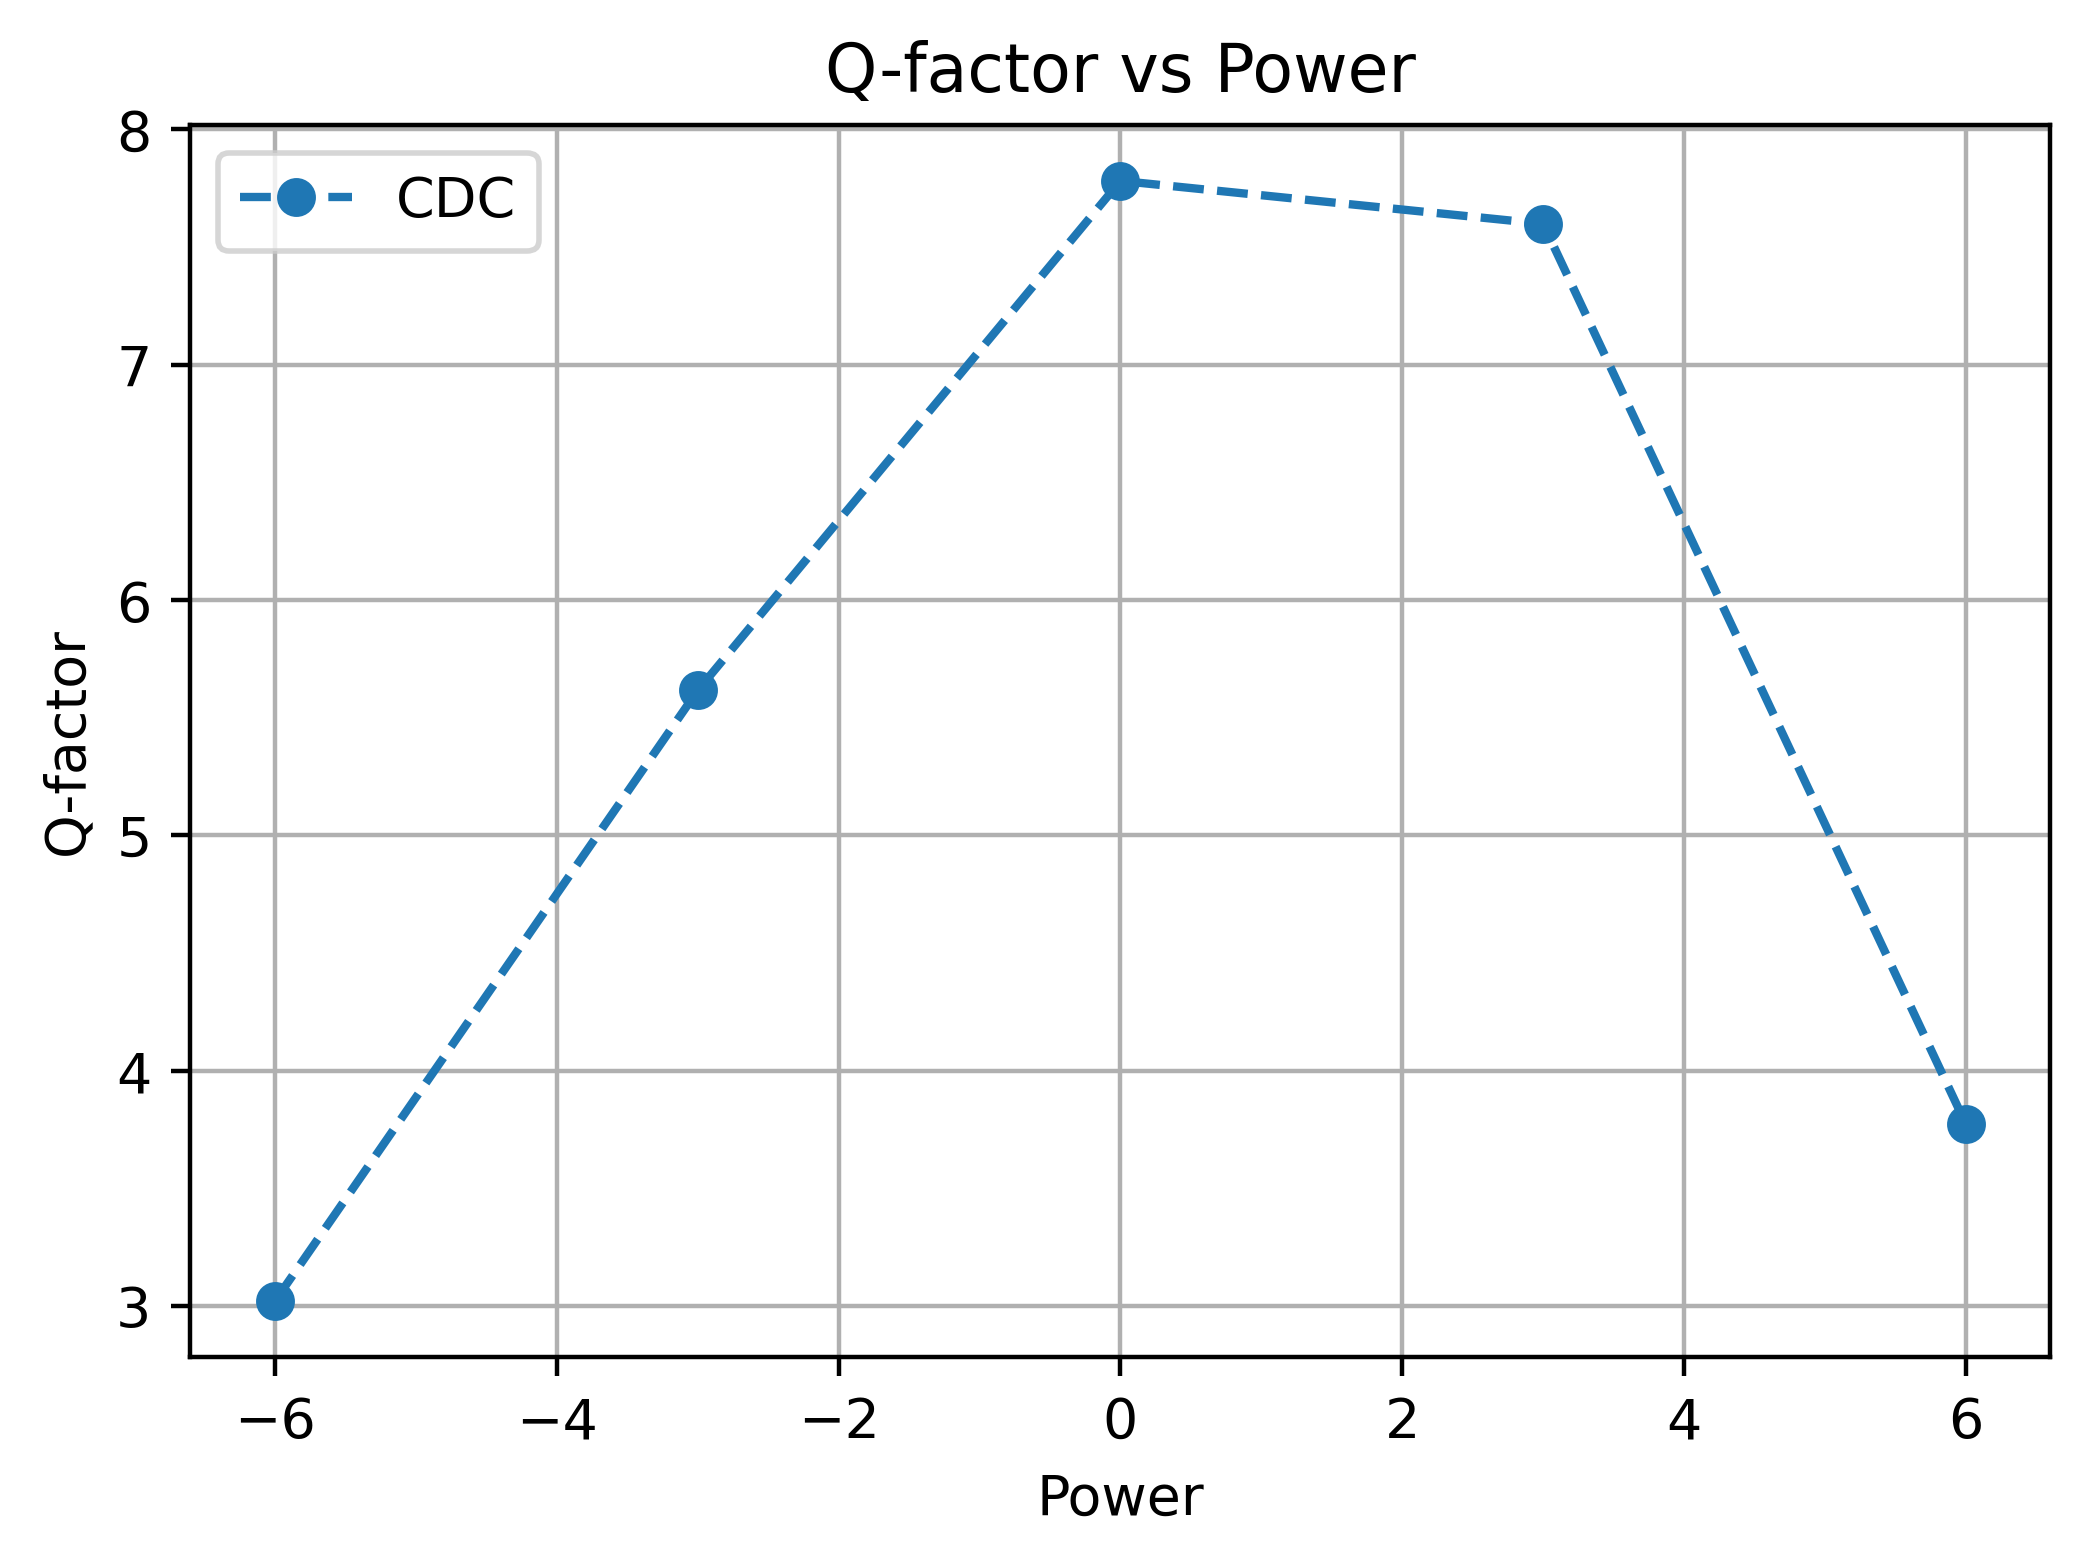

In [66]:
import matplotlib.pyplot as plt

plt.figure(dpi=400, figsize=(6, 4))
plt.plot([-6, -3, 0, 3, 6], Q0, '--o', label='CDC')
plt.grid()
plt.xlabel('Power')
plt.ylabel('Q-factor')
# plt.ylim(6, 8.8)
plt.title('Q-factor vs Power')
plt.legend(loc='upper left')

# load baseline

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from scripts.visualize import load_experiment, load_baseline
import pkufiber as pf

In [15]:
cdc, power = load_baseline('configs/dsp/test_eq.yaml', 'CDC')
dbp4, power = load_baseline('configs/dsp/test_eq.yaml', 'DBP4')
dbp8, power = load_baseline('configs/dsp/test_eq.yaml', 'DBP8')

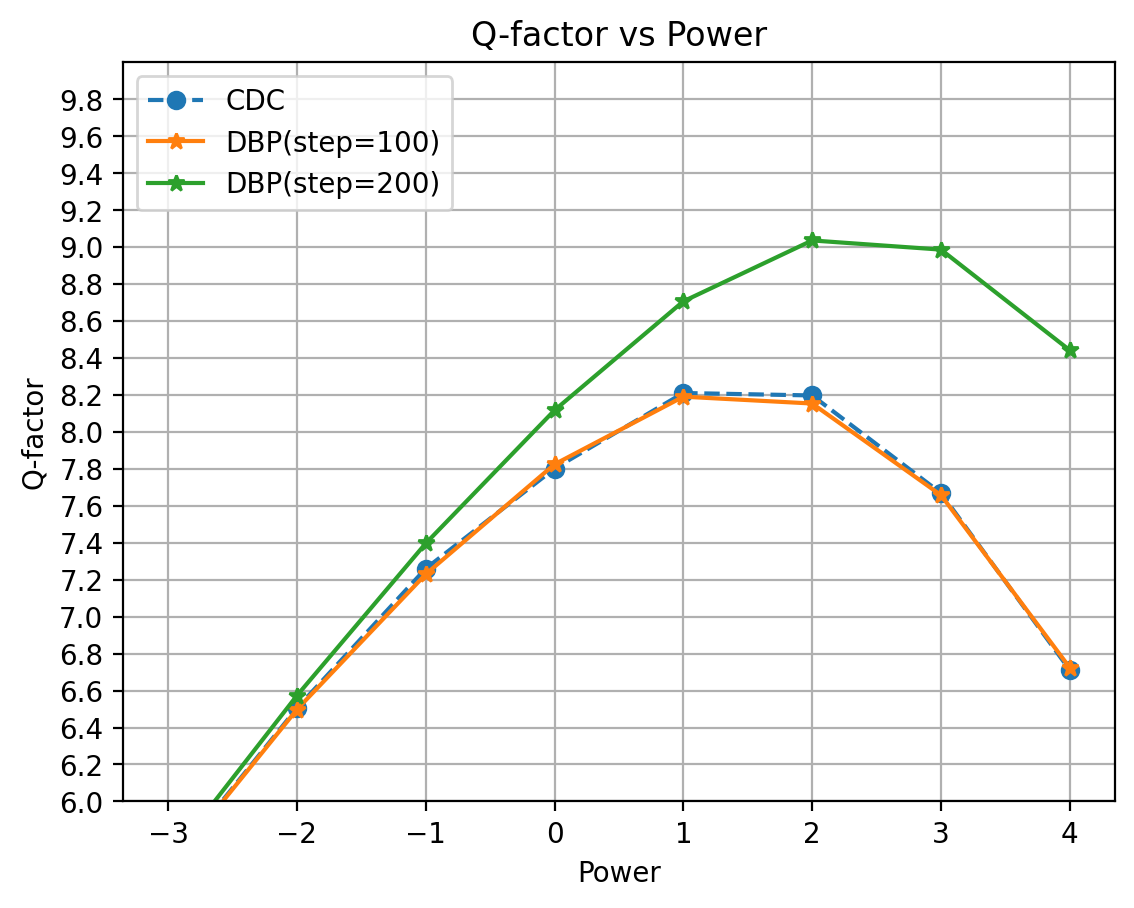

In [20]:
plt.figure(dpi=200)
plt.plot(power, cdc, '--o', label='CDC')
plt.plot(power, dbp4, '-*', label='DBP(step=100)')
plt.plot(power, dbp8, '-*', label='DBP(step=200)')
plt.grid()
plt.xlabel('Power')
plt.ylabel('Q-factor')
plt.ylim(6, 10)
plt.title('Q-factor vs Power')
plt.yticks(np.arange(6, 10, 0.2))
plt.legend(loc='upper left')

# N-filter

torch.Size([2, 2, 801])


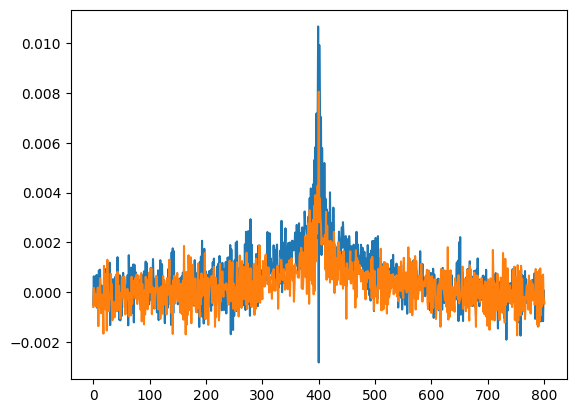

In [28]:
import torch 
import matplotlib.pyplot as plt

path = 'experiments/0926_fdbp_v6/models/60.pth'
dic = torch.load(path, map_location='cpu')

Nf = dic['dbp_param']['Nkernel.0']
print(Nf.shape)


plt.plot(Nf[0,0,:])
plt.plot(Nf[0,1,:])

torch.Size([2, 2, 201])


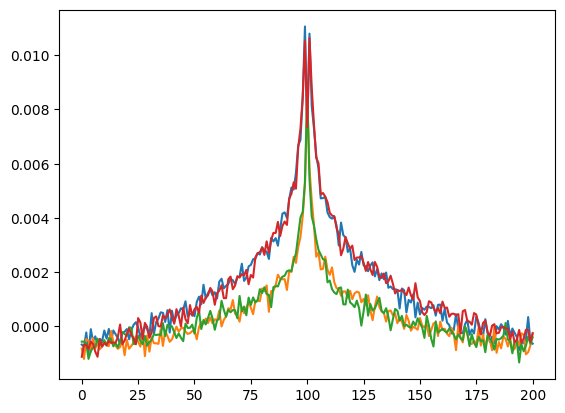

In [1]:
import torch 
import matplotlib.pyplot as plt

path = 'experiments/0926_eqfdbp_v3/models/60.pth'
dic = torch.load(path, map_location='cpu')

Nf = dic['model_param']['nonlinear.Nkernel.0']
print(Nf.shape)


plt.plot(Nf[0,0,:])
plt.plot(Nf[0,1,:])
plt.plot(Nf[1,0,:])
plt.plot(Nf[1,1,:])

torch.Size([2, 2, 801])